In [13]:
!pip install gdown numpy pandas matplotlib

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gdown

In [15]:
# Функція гіпотези лінійної регресії у векторному вигляді
def linear_hypothesis(X, theta):
    return np.dot(X, theta)

In [16]:
# Функція для обчислення функції втрат у векторному вигляді (середньоквадратична помилка)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = linear_hypothesis(X, theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

In [17]:
# Один крок градієнтного спуску
def gradient_descent_step(X, y, theta, learning_rate):
    m = len(y)
    predictions = linear_hypothesis(X, theta)
    gradient = (1/m) * np.dot(X.T, (predictions - y))
    theta -= learning_rate * gradient
    return theta

In [18]:
# Завантаження даних із вказаного URL та створення датафрейму
file_url = 'https://drive.google.com/uc?id=1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo'
output = 'Housing.csv'
gdown.download(file_url, output, quiet=False)

data = pd.read_csv('Housing.csv')

# Перегляд назв колонок
print(data.columns)

# Розділення даних на ознаки (X) та цільову змінну (y)
X = data[['area', 'bedrooms', 'bathrooms']].values
y = data['price'].values

# Додавання стовпця з одиницями (для bias)
X = np.c_[np.ones(X.shape[0]), X]

Downloading...
From: https://drive.google.com/uc?id=1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo
To: /content/Housing.csv
100%|██████████| 30.0k/30.0k [00:00<00:00, 29.4MB/s]

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [19]:
# Параметри градієнтного спуску
iterations = 1500
learning_rate = 0.01
theta = np.zeros(X.shape[1])

# Градієнтний спуск
for _ in range(iterations):
    theta = gradient_descent_step(X, y, theta, learning_rate)

<ipython-input-17-f02464788bb2>:6: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


In [20]:
# Виведення найкращих параметрів w
print("Найкращі параметри w (градієнтний спуск):", theta)

# Знайдення параметрів за допомогою аналітичного рішення
theta_analytical = np.linalg.inv(X.T @ X) @ X.T @ y
print("Найкращі параметри w (аналітичний розв'язок):", theta_analytical)

Найкращі параметри w (градієнтний спуск): [nan nan nan nan]
Найкращі параметри w (аналітичний розв'язок): [-1.73171608e+05  3.78762754e+02  4.06820034e+05  1.38604950e+06]


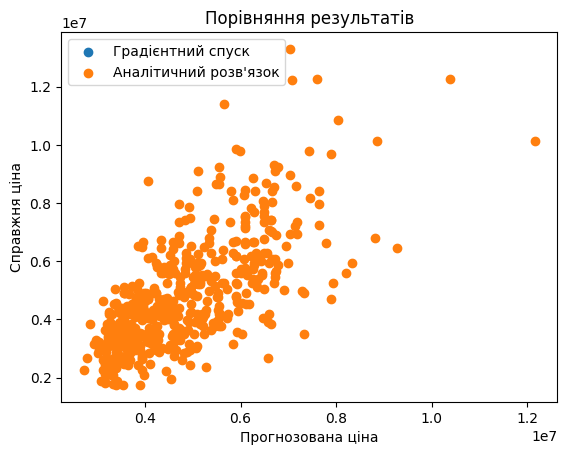

In [21]:
# Порівняння результатів
predictions_gradient_descent = linear_hypothesis(X, theta)
predictions_analytical = linear_hypothesis(X, theta_analytical)
plt.scatter(predictions_gradient_descent, y, label='Градієнтний спуск')
plt.scatter(predictions_analytical, y, label='Аналітичний розв\'язок')
plt.xlabel('Прогнозована ціна')
plt.ylabel('Справжня ціна')
plt.title('Порівняння результатів')
plt.legend()
plt.show()